#  **Real estate price prediction**

#  Import & Install Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

##  Check out the Data

In [76]:
df=pd.read_csv('../input/real-estate-price-prediction/Real estate.csv')

In [77]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [78]:
df.shape

(414, 8)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [80]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


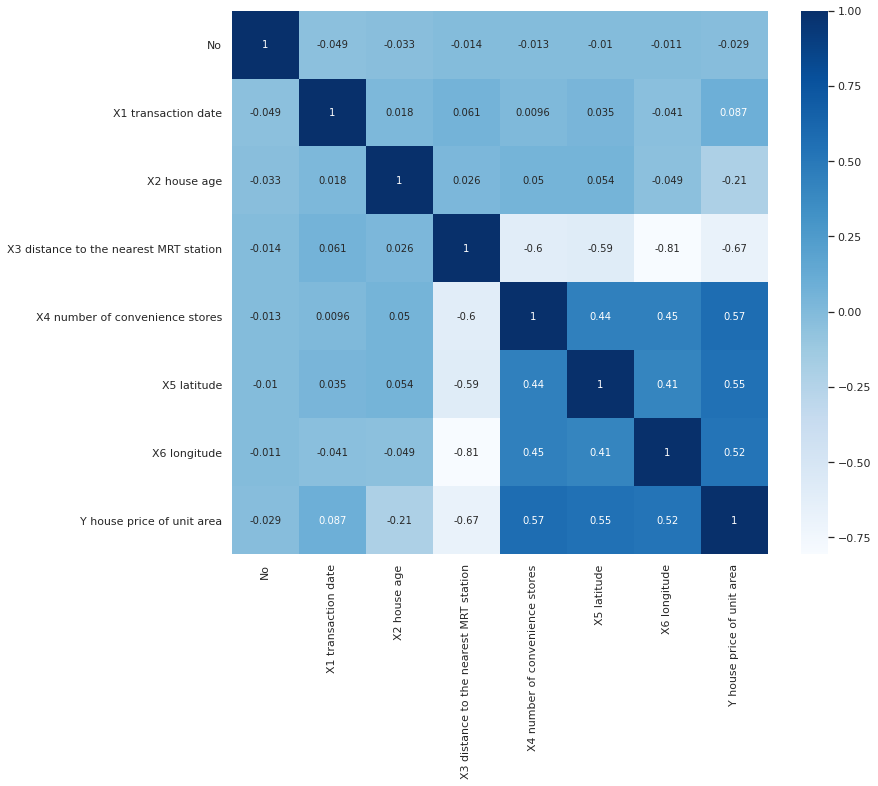

In [81]:
plt.figure(figsize=(12, 10))  
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#  Exploratory Data Analysis (EDA)

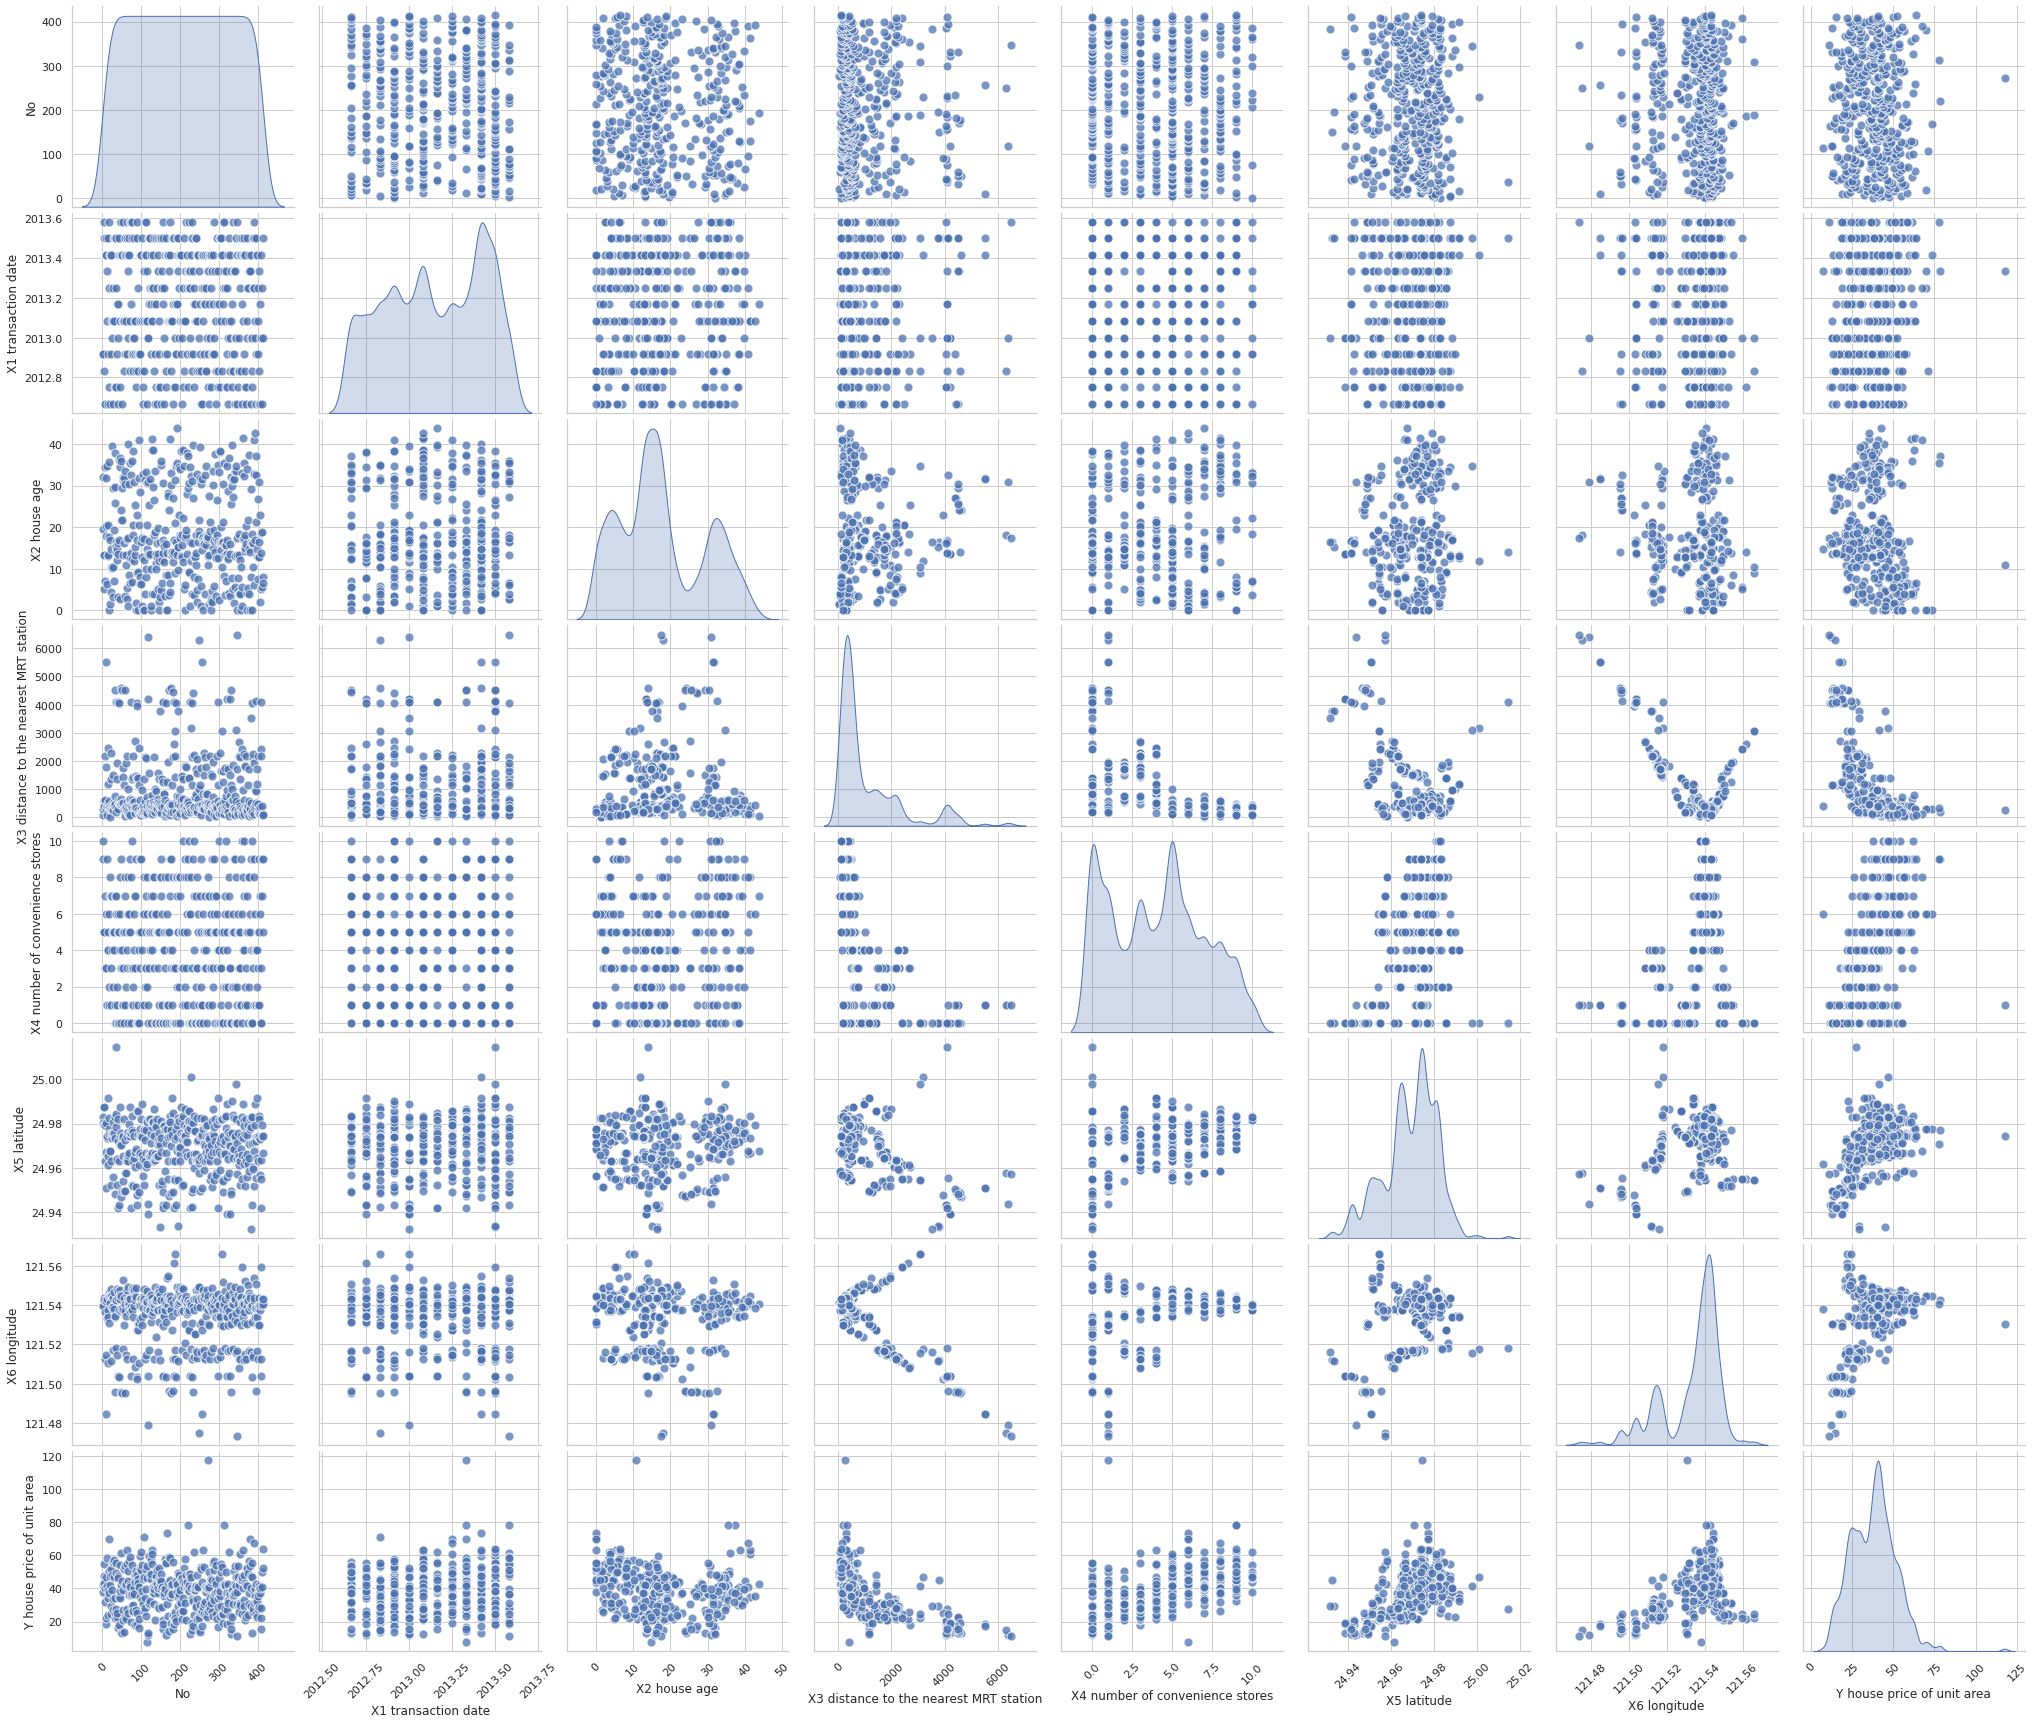

In [82]:
sns.set_theme(style="whitegrid", context="notebook")
g = sns.pairplot(df,
                 kind="scatter",
                 diag_kind="kde",
                 height=3,
                 aspect=1.2,
                 plot_kws={"s": 80, "edgecolor": "white", "linewidth": 1, "alpha": 0.75},
                 diag_kws={"shade": True, "bw_adjust": 0.5},
                 palette="viridis")
for ax in g.axes.flatten():
    if ax:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
plt.show()

#  Training 

In [83]:
X=df.drop('Y house price of unit area', axis=1)

y=df['X4 number of convenience stores']

In [84]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 7) 
y= (414,)


##  Train Test Split


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [86]:
X_train.shape

(331, 7)

In [87]:
X_test.shape

(83, 7)

#  Model

In [112]:
model = LinearRegression()
# model = RandomForestRegressor()

In [113]:
model.fit(X_train, y_train)

LinearRegression()

##  Coeficient result

In [114]:
model.coef_

array([-1.15344698e-17, -1.73368926e-14,  6.56894622e-17, -1.38888054e-17,
        1.00000000e+00,  1.05543677e-15,  7.11528089e-16])

In [115]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficients'])

,Coeficients
No,-1.153447e-17
X1 transaction date,-1.733689e-14
X2 house age,6.568946e-17
X3 distance to the nearest MRT station,-1.388881e-17
X4 number of convenience stores,1.000000e+00
X5 latitude,1.055437e-15
X6 longitude,7.115281e-16


##  Predictions 

In [116]:
y_pred = model.predict(X_test)

In [117]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [118]:
MAE

1.3944791166339482e-14

In [119]:
MSE

4.166232310519282e-28

In [120]:
RMSE

2.0411350544535955e-14

In [121]:
test_residual= y_test - y_pred

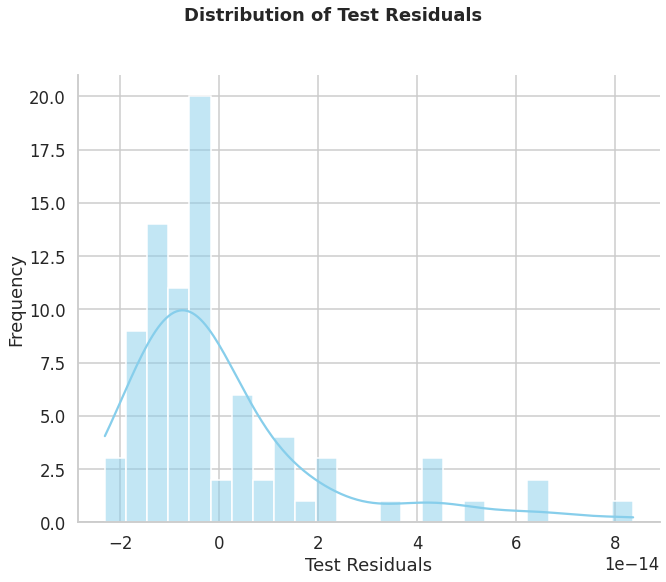

In [122]:
sns.set_theme(style="whitegrid", context="talk")
g = sns.displot(test_residual, bins=25, kde=True, height=8, aspect=1.2,
                color="skyblue")
g.set_axis_labels("Test Residuals", "Frequency")
g.fig.suptitle("Distribution of Test Residuals", fontsize=18, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

* **Residual plot shows residual error VS. true y value.**

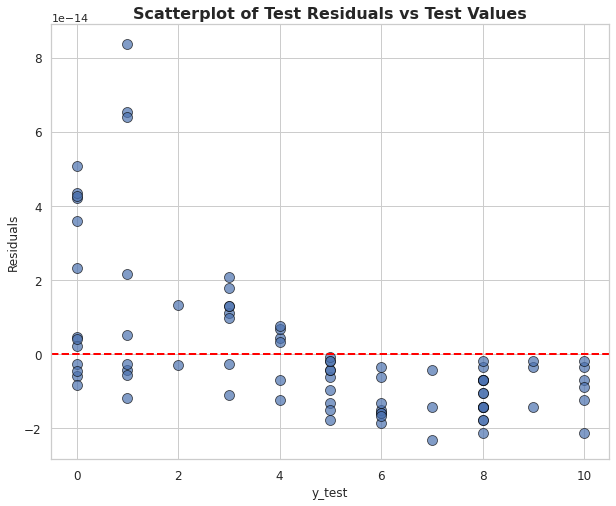

In [123]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=test_residual, s=100, alpha=0.7, edgecolor='black', marker='o')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("y_test", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Scatterplot of Test Residuals vs Test Values", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()
